In [1]:
from pandas import read_excel
from pandas import datetime
from pandas import DataFrame
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

### Differencing function

In [2]:
def diffr(dataset):
    diff=list()
    for i in range(1, len(dataset)):
        value = dataset[i]-dataset[i-1]
        diff.append(value)
    return diff

# 1. FFIV 

### data plot & autocorrelation plot: Non-stationarity is slightly present.

date
2010-01-04    53.980000
2010-01-05    52.520000
2010-01-06    52.759998
2010-01-07    52.230000
2010-01-08    52.959999
Name: close, dtype: float64


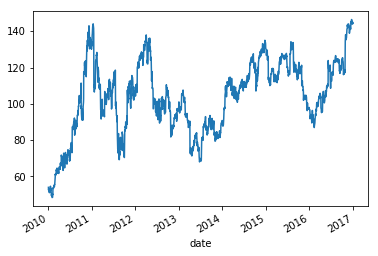

In [4]:
data = read_excel('arima_FFIV.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(data.head())
data.plot()
pyplot.show()

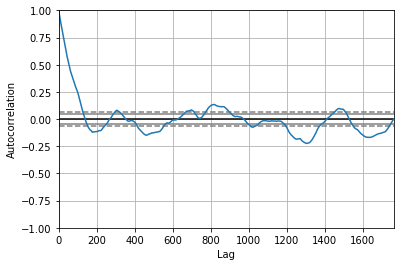

In [5]:
autocorrelation_plot(data)
pyplot.show()

### Augmented Dickey Fuller Test- Stationarity check: p-value is >0.05, hence data is non-stationary

In [6]:
X=data.values
result = adfuller(X)
print('ADF Statistic for X: %f' % result[0])
print('p value for X: %f' % result[1])

ADF Statistic for X: -2.642250
p value for X: 0.084576


### Checking ADF test again, after 1 differencing. p-value<0.05 -> data is now stationary -> hence confirmed d=1

In [7]:
Y=diffr(X)
result1 = adfuller(Y)
print('ADF Statistic for Y: %f' % result1[0])
print('p value for Y: %f' % result1[1])

ADF Statistic for Y: -22.782761
p value for Y: 0.000000


### Checking acf & pacf plots to determine q (for MA) & p (for AR) resp.

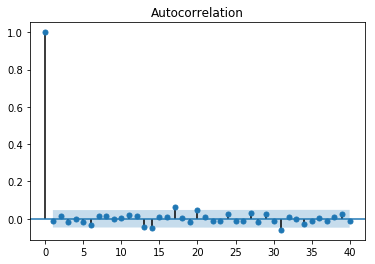

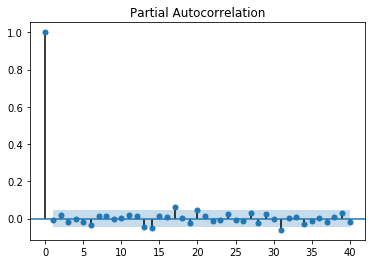

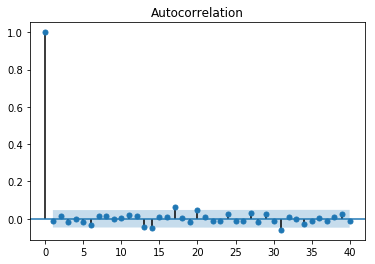

In [21]:
plot_pacf(Y, lags=40)
plot_acf(Y, lags=40)

### Creating train and test sets, creating prediction for every observation in the test set

In [9]:
size= int(len(X)*0.8)
train, test = X[0:size], X[size:len(X)]
history =[i for i in train]
prediction = list()
for j in range(0, len(test)):
    model = ARIMA(history, order=(1,1,0))
    model_fit =  model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test[j]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, prediction))
print('Test MSE: %.3f' % rmse)

C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Roshiny Thomas\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

predicted=130.415840, expected=132.339996
predicted=132.402524, expected=131.369995
predicted=131.421411, expected=132.710007
predicted=132.769964, expected=131.630005
predicted=131.681493, expected=132.610001
predicted=132.668393, expected=133.860001
predicted=133.920178, expected=133.000000
predicted=133.053119, expected=132.750000
predicted=132.804708, expected=126.559998
predicted=126.591199, expected=122.510002
predicted=122.534079, expected=117.470001
predicted=117.473449, expected=117.470001
predicted=117.514341, expected=122.449997
predicted=122.538108, expected=122.790001
predicted=122.840782, expected=122.970001
predicted=123.019557, expected=121.410004
predicted=121.444151, expected=118.389999
predicted=118.408434, expected=121.000000
predicted=121.067215, expected=121.239998
predicted=121.288654, expected=118.839996
predicted=118.866118, expected=121.709999
predicted=121.777585, expected=119.889999
predicted=119.923776, expected=119.739998
predicted=119.784645, expected=118

predicted=108.843562, expected=110.199997
predicted=110.237545, expected=109.489998
predicted=109.523016, expected=110.839996
predicted=110.877559, expected=110.220001
predicted=110.253716, expected=110.040001
predicted=110.074324, expected=123.940002
predicted=124.002798, expected=120.349998
predicted=120.403712, expected=119.680000
predicted=119.722887, expected=119.410004
predicted=119.451395, expected=118.480003
predicted=118.522890, expected=118.080002
predicted=118.120908, expected=119.150002
predicted=119.186871, expected=119.029999
predicted=119.070571, expected=118.559998
predicted=118.601374, expected=119.250000
predicted=119.288044, expected=119.290001
predicted=119.330146, expected=118.610001
predicted=118.652029, expected=121.440002
predicted=121.471863, expected=113.400002
predicted=113.481703, expected=108.639999
predicted=108.682355, expected=110.309998
predicted=110.340276, expected=112.519997
predicted=112.550953, expected=113.839996
predicted=113.874087, expected=113

# 2. FDX

### Loading data and plotting the series for FDX

date
2010-01-04    83.449997
2010-01-05    84.540001
2010-01-06    83.839996
2010-01-07    82.930000
2010-01-08    84.989998
Name: close, dtype: float64


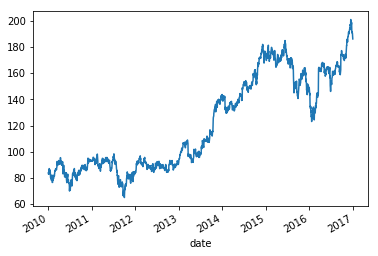

In [13]:
data = read_excel('arima_FDX.xlsx', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(data.head())
data.plot()
pyplot.show()

In [14]:
X=data.values
result = adfuller(X)
print('ADF Statistic for X: %f' % result[0])
print('p value for X: %f' % result[1])

ADF Statistic for X: -0.512701
p value for X: 0.889514


In [15]:
Y=diffr(X)
result1 = adfuller(Y)
print('ADF Statistic for Y: %f' % result1[0])
print('p value for Y: %f' % result1[1])

ADF Statistic for Y: -42.336451
p value for Y: 0.000000


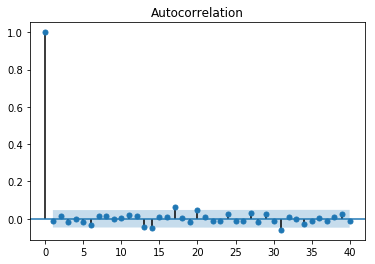

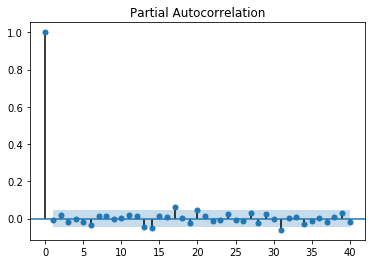

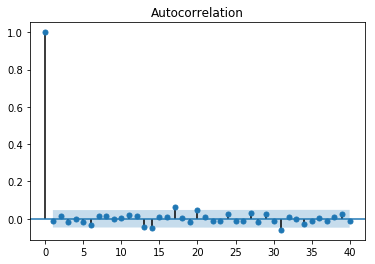

In [16]:
plot_pacf(Y, lags=40)
plot_acf(Y, lags=40)

In [ ]:
size= int(len(X)*0.8)
train, test = X[0:size], X[size:len(X)]
history =[i for i in train]
prediction = list()
for j in range(0, len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit =  model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    prediction.append(yhat)
    obs = test[j]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, prediction))
print('Test MSE: %.3f' % rmse)

predicted=167.146209, expected=169.399994
predicted=169.475108, expected=168.429993
predicted=168.542649, expected=165.309998
predicted=165.534665, expected=163.600006
predicted=163.853735, expected=164.809998
predicted=164.982211, expected=164.970001
predicted=165.115045, expected=165.660004
predicted=165.763740, expected=164.949997
predicted=165.073124, expected=160.449997
predicted=160.729693, expected=156.029999
predicted=156.401581, expected=148.369995
predicted=148.588183, expected=145.059998
predicted=145.115626, expected=148.429993
predicted=148.396611, expected=153.039993
predicted=153.035381, expected=152.500000
predicted=152.581426, expected=150.610001
predicted=150.677670, expected=148.029999
predicted=148.109968, expected=150.820007
predicted=150.929344, expected=151.210007
predicted=151.299327, expected=148.610001
predicted=148.756225, expected=153.289993
predicted=153.295014, expected=151.559998
predicted=151.619299, expected=149.570007
predicted=149.686017, expected=151

predicted=159.515333, expected=159.110001
predicted=159.177382, expected=161.630005
predicted=161.622802, expected=162.039993
predicted=162.114832, expected=164.380005
predicted=164.373494, expected=164.220001
predicted=164.307705, expected=163.399994
predicted=163.443408, expected=164.470001
predicted=164.505537, expected=164.970001
predicted=165.021141, expected=164.699997
predicted=164.755683, expected=164.800003
predicted=164.846410, expected=163.820007
predicted=163.890298, expected=163.270004
predicted=163.317951, expected=164.830002
predicted=164.854573, expected=164.750000
predicted=164.817581, expected=164.110001
predicted=164.161838, expected=160.869995
predicted=160.973840, expected=160.429993
predicted=160.453195, expected=159.750000
predicted=159.824087, expected=159.660004
predicted=159.693344, expected=161.869995
predicted=161.888983, expected=162.250000
predicted=162.309885, expected=164.470001
predicted=164.475735, expected=163.949997
predicted=164.035416, expected=156